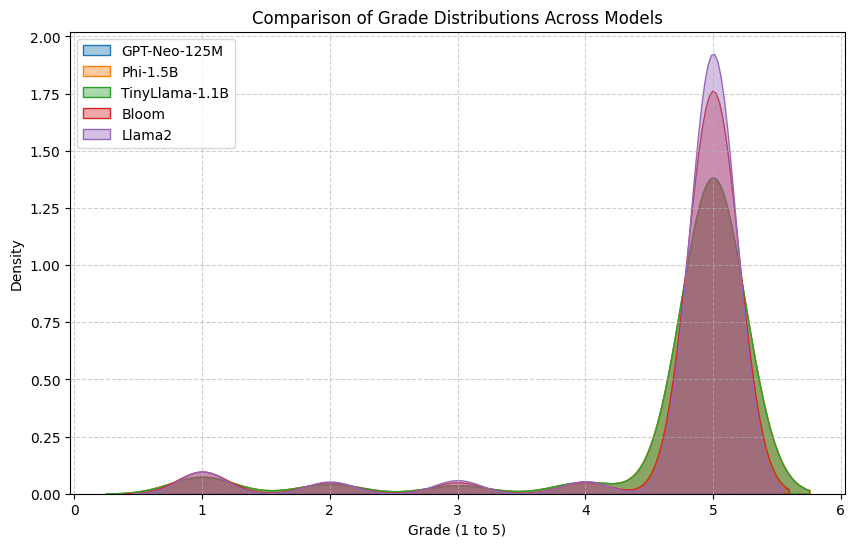

Comparison plot saved as grade_distribution_comparison.png


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths for graded summaries of different models
graded_files = {
    "GPT-Neo-125M": "graded_test_summaries_GPT-Neo-125M.csv",
    "Phi-1.5B": "graded_test_summaries_Phi-1.5B.csv",
    "TinyLlama-1.1B": "graded_test_summaries_TinyLlama-1.1B.csv",
    "Bloom": [
        "graded_biographies_part1_bloom.csv",
        "graded_biographies_part2_bloom.csv"
    ],
    "Llama2": [
        "graded_biographies_part1_llama2.csv",
        "graded_biographies_part2_llama2.csv",
        "graded_biographies_part3_llama2.csv"
    ]
}

# Dictionary to store grades
grade_data = {}

# Load and combine grades for each model
for model, files in graded_files.items():
    all_grades = []
    if isinstance(files, list):  # If multiple files exist for a model
        for file in files:
            df = pd.read_csv(file)
            all_grades.extend(df["grade"].tolist())
    else:  # Single file
        df = pd.read_csv(files)
        all_grades.extend(df["grade"].tolist())

    grade_data[model] = all_grades

# Plot the distributions
plt.figure(figsize=(10, 6))

for model, grades in grade_data.items():
    sns.kdeplot(grades, label=model, fill=True, alpha=0.4)

plt.xlabel("Grade (1 to 5)")
plt.ylabel("Density")
plt.title("Comparison of Grade Distributions Across Models")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
comparison_plot_path = "grade_distribution_comparison.png"
plt.savefig(comparison_plot_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

print(f"Comparison plot saved as {comparison_plot_path}")


In [7]:
import pandas as pd

# 1) Combine Bloom files
df_bloom_p1 = pd.read_csv("graded_biographies_part1_bloom.csv")
df_bloom_p2 = pd.read_csv("graded_biographies_part2_bloom.csv")
df_bloom = pd.concat([df_bloom_p1, df_bloom_p2], ignore_index=True)

# Rename columns for Bloom
df_bloom = df_bloom.rename(columns={
    "summary": "bloom_summary",
    "grade":   "bloom_grade"
})

# 2) Combine LLaMA-2 files
df_llama_p1 = pd.read_csv("graded_biographies_part1_llama2.csv")
df_llama_p2 = pd.read_csv("graded_biographies_part2_llama2.csv")
df_llama_p3 = pd.read_csv("graded_biographies_part3_llama2.csv")
df_llama = pd.concat([df_llama_p1, df_llama_p2, df_llama_p3], ignore_index=True)

df_llama = df_llama.rename(columns={
    "summary": "llama_summary",
    "grade":   "llama_grade"
})

# 3) Load the test-summaries CSVs for GPT-Neo, Phi, and TinyLlama
df_neo  = pd.read_csv("graded_test_summaries_GPT-Neo-125M.csv").rename(
    columns={"generated_summary": "neo_summary", "grade": "neo_grade"}
)
df_phi  = pd.read_csv("graded_test_summaries_Phi-1.5B.csv").rename(
    columns={"generated_summary": "phi_summary", "grade": "phi_grade"}
)
df_tiny = pd.read_csv("graded_test_summaries_TinyLlama-1.1B.csv").rename(
    columns={"generated_summary": "tiny_summary", "grade": "tiny_grade"}
)

# 4) Merge Bloom and LLaMA-2 on "document"
df_bloom_llama = df_bloom.merge(df_llama, on="document", how="inner")

# 5) Merge with GPT-Neo
df_merged = df_bloom_llama.merge(df_neo, on="document", how="left")
# 6) Merge with Phi
df_merged = df_merged.merge(df_phi, on="document", how="left")
# 7) Merge with TinyLlama
df_merged = df_merged.merge(df_tiny, on="document", how="left")

# Filter on "Constantin Adam" in case you know there's a relevant row
df_filtered = df_merged[df_merged["document"].str.contains("Constantin Adam", case=False, na=False)]

# If multiple matches exist, pick one; if exactly one, it'll just return that
if not df_filtered.empty:
    row = df_filtered.sample(n=1).iloc[0]
    latex_table = f"""
    \\begin{{table}}[ht!]
    \\centering
    \\begin{{tabular}}{{|p{{12cm}}|}}
    \\hline
    \\textbf{{Excerpt from Document}}: {row['document'][:300]}... \\\\ \\hline
    \\textbf{{Bloom Summary}}: {row['bloom_summary']} \\\\ \\hline
    \\textbf{{LLaMA-2 Summary}}: {row['llama_summary']} \\\\ \\hline
    \\textbf{{GPT-Neo-125M Summary}}: {row['neo_summary']} \\\\ \\hline
    \\textbf{{Phi-1.5B Summary}}: {row['phi_summary']} \\\\ \\hline
    \\textbf{{TinyLlama-1.1B Summary}}: {row['tiny_summary']} \\\\ \\hline
    \\end{{tabular}}
    \\caption{{Comparison of Summaries for Constantin Adam}}
    \\end{{table}}
    """

    print(latex_table)
else:
    print("No entries found that contain 'Constantin Adam'.")



    \begin{table}[ht!]
    \centering
    \begin{tabular}{|p{12cm}|}
    \hline
    \textbf{Excerpt from Document}: Constantin Adam (Călărași, 12 de julio de 1996) es un deportista rumano que compite en remo.​ Ganó cuatro medallas en el Campeonato Europeo de Remo entre los años 2018 y 2024.​ Participó en dos Juegos Olímpicos de Verano, en los años 2016 y 2020, ocupando el séptimo lugar en Tokio 2020, en la prueba... \\ \hline
    \textbf{Bloom Summary}: Constantin Adam (Călărași, 12 de julio de 1996) es un deportista rumano que compite en remo.​ Ganó cuatro medallas en el Campeonato Europeo de Remo entre los años 2018 y 2024.​ Participó en dos Juegos Olímpicos de Verano, en los años 2016 y 2020, ocupando el séptimo lugar en Tokio 2020, en la prueba de ocho con timonel.​
Esta estadística presenta el número de matriculaciones de automóviles en España en 2019, desglosado por tipo de combustible. En ese año, el número de vehículos eléctricos matriculados en nuestro país fue de 5.200 unida

Unique grades across all datasets: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]


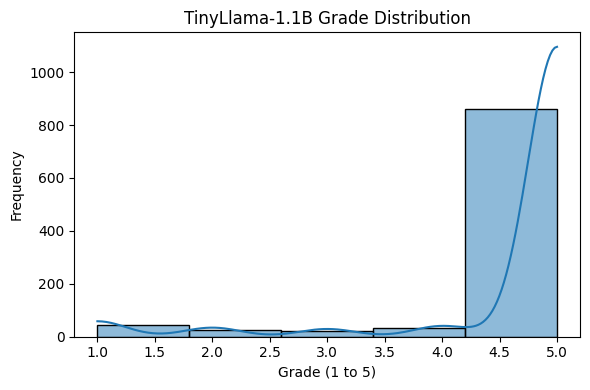

TinyLlama-1.1B distribution plot saved as tinyllama_grade_distribution.png.


In [5]:
import pandas as pd

# File paths for graded summaries
graded_files = [
    "graded_test_summaries_GPT-Neo-125M.csv",
    "graded_test_summaries_Phi-1.5B.csv",
    "graded_biographies_part1_bloom.csv",
    "graded_biographies_part2_bloom.csv",
    "graded_biographies_part1_llama2.csv",
    "graded_biographies_part2_llama2.csv",
    "graded_biographies_part3_llama2.csv"
]

# Set to store unique grades
unique_grades = set()

# Load and extract unique grades
for file in graded_files:
    try:
        df = pd.read_csv(file)
        unique_grades.update(df["grade"].unique())  # Add unique values to the set
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Display sorted unique grades
sorted_grades = sorted(unique_grades)
print("Unique grades across all datasets:", sorted_grades)
